<a href="https://colab.research.google.com/github/LoveyThePigeon/Algorithms/blob/main/W6_DFS_and_BFS_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DFS sequence of visited nodes: ['A', 'B', 'D', 'E', 'C', 'F']



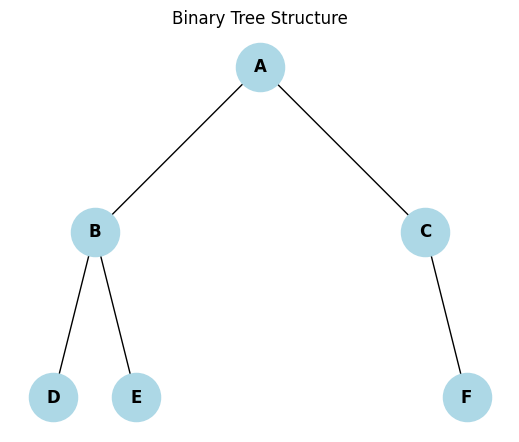

In [48]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the Node class
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Build the example binary tree with letters
root = Node('A')
root.left = Node('B')
root.right = Node('C')
root.left.left = Node('D')
root.left.right = Node('E')
root.right.right = Node('F')

# DFS traversal order (preorder: root -> left -> right)
def dfs_order(root, visited=None): # at the beginning, there is no visited array, so = None,
    if visited is None:            # later it gets recursively passed
        visited = [] # created at the beginning, keeps track of nodes visited
    if root:
        visited.append(root.value) # visits root/ current node, adds to visited
        dfs_order(root.left, visited) # visits left recursively, passed root.left becomes root
        dfs_order(root.right, visited) # visits right recursively, passed root.right becomes root

    return visited # returns at the complete end, when last root.left and root.right are None

# Get DFS order
dfs_sequence = dfs_order(root)
print("DFS sequence of visited nodes:", dfs_sequence)
print("")

# Build a graph for visualization
G = nx.DiGraph()
edges = [
    ('A', 'B'), ('A', 'C'),
    ('B', 'D'), ('B', 'E'),
    ('C', 'F')
]
G.add_edges_from(edges)

# Position nodes with a compact layout
pos = {
    'A': (0, 3),
    'B': (-0.8, 2),
    'C': (0.8, 2),
    'D': (-1, 1),
    'E': (-0.6, 1),
    'F': (1, 1)
}

plt.figure(figsize=(5, 4))
nx.draw(G, pos, with_labels=True, node_size=1200, node_color="lightblue", font_size=12, font_weight="bold", arrows=False)
plt.title("Binary Tree Structure")
plt.show()


In [49]:
# Run BFS starting from chosen node, visits only children
bfs_sequence = bfs(tree, "B")
print("BFS sequence of visited nodes:", bfs_sequence)
print("")

BFS sequence of visited nodes: ['B', 'D', 'E']



BFS sequence of visited nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G']


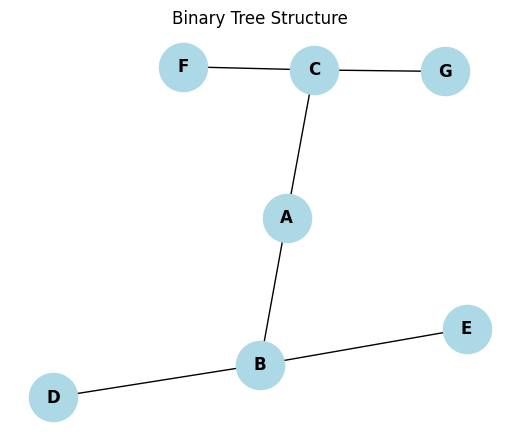

In [50]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Create a simple binary tree using letters
tree = {
    'A': ['B', 'C'], # A has children B and C
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [], # D has no children
    'E': [],
    'F': [],
    'G': []
}

# BFS function
def bfs(tree, start):
    visited = []
    queue = deque([start]) # initialize queue with starting node

    while queue: # runs until something left in queue
        node = queue.popleft() # take first node from queue
        visited.append(node) # append the node to visited
        for child in tree.get(node, []): # iterate over children of the node
            queue.append(child) # add children to queue
    return visited # at the complete end returns visited nodes

# Run BFS starting from node 'A'
bfs_sequence = bfs(tree, 'A')
print("BFS sequence of visited nodes:", bfs_sequence)

# Plot the tree
G = nx.DiGraph()
for parent, children in tree.items():
    for child in children:
        G.add_edge(parent, child)

# can be manually arranged same as in code for DFS or auto arranged
pos = nx.spring_layout(G)

# draw graph
plt.figure(figsize=(5, 4))
nx.draw(G, pos, with_labels=True, node_size=1200, node_color="lightblue", font_size=12, font_weight="bold", arrows=False)
plt.title("Binary Tree Structure")
plt.show()
